<a href="https://colab.research.google.com/github/SIDDHARTHA2301/COVID-19/blob/master/COVID_19_INDIA_VIZ_PART_1_19_5_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "siddharthabose2301" # username from the json file
os.environ['KAGGLE_KEY'] = "088b8c75aec9e4bafbe472fae7e2c06e" # key from the json file
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 70.2MB/s]


In [2]:
! unzip novel-corona-virus-2019-dataset.zip

Archive:  novel-corona-virus-2019-dataset.zip
  inflating: COVID19_line_list_data.csv  
  inflating: COVID19_open_line_list.csv  
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates

In [4]:
def india_data_confirmed():
    confirmed  = pd.read_csv("time_series_covid_19_confirmed.csv")
    confirmed = confirmed[confirmed['Country/Region']=='India'].groupby('Country/Region').sum().drop(["Lat","Long"],axis = 1).T.reset_index()
    confirmed.rename(columns = {'index':'Date','India':'Confirmed Cases'},inplace = True)
    confirmed.columns.name = ""
    confirmed['Date'] = pd.to_datetime(confirmed['Date'])
    confirmed.sort_values('Date')
    return confirmed

data_confirmed = india_data_confirmed()
data_confirmed

,Date,Confirmed Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
113,2020-05-14,81997
114,2020-05-15,85784
115,2020-05-16,90648
116,2020-05-17,95698


In [5]:
def india_data_recovered():
    recovered  = pd.read_csv("time_series_covid_19_recovered.csv")
    recovered = recovered[recovered['Country/Region']=='India'].groupby('Country/Region').sum().drop(["Lat","Long"],axis = 1).T.reset_index()
    recovered.rename(columns = {'index':'Date','India':'Recovered Cases'},inplace = True)
    recovered.columns.name = ""
    recovered['Date'] = pd.to_datetime(recovered['Date'])
    recovered.sort_values('Date')
    return recovered

data_recovered = india_data_recovered()
data_recovered

,Date,Recovered Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
113,2020-05-14,27969
114,2020-05-15,30258
115,2020-05-16,34224
116,2020-05-17,36795


In [6]:
def india_data_death():
    death  = pd.read_csv("time_series_covid_19_deaths.csv")
    death = death[death['Country/Region']=='India'].groupby('Country/Region').sum().drop(["Lat","Long"],axis = 1).T.reset_index()
    death.rename(columns = {'index':'Date','India':'Death Cases'},inplace = True)
    death.columns.name = ""
    death['Date'] = pd.to_datetime(death['Date'])
    death.sort_values('Date')
    return death

data_death = india_data_death()
data_death

,Date,Death Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
113,2020-05-14,2649
114,2020-05-15,2753
115,2020-05-16,2871
116,2020-05-17,3025


In [7]:
def full_data():
    data_confirmed = india_data_confirmed()
    data_recovered = india_data_recovered()
    data_death = india_data_death()
    full = pd.merge(data_confirmed,data_recovered, on='Date')
    full = pd.merge(full,data_death, on='Date')
    full.set_index('Date',inplace = True)
    return full

india_data = full_data()
india_data

,Confirmed Cases,Recovered Cases,Death Cases
Date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-05-14,81997,27969,2649
2020-05-15,85784,30258,2753
2020-05-16,90648,34224,2871


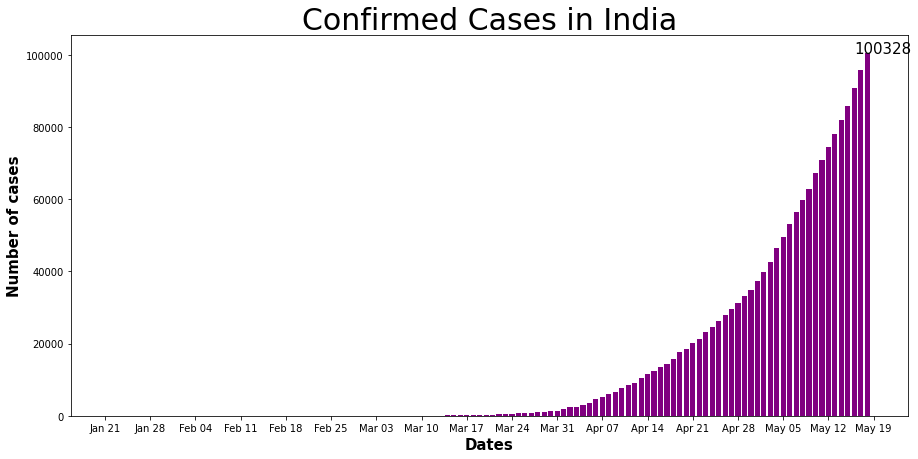

In [8]:
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.bar(india_data.index,india_data['Confirmed Cases'],color = 'purple')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.set_title("Confirmed Cases in India",size = 30)
ax1.set_xlabel("Dates",size = 15,weight = 'bold')
ax1.set_ylabel("Number of cases",size = 15,weight = 'bold')
ax1.annotate(india_data.iloc[len(india_data)-1]['Confirmed Cases'],xy = (india_data.index[len(india_data)-3],india_data.iloc[len(india_data)-1]['Confirmed Cases']+200),size = 15)
from google.colab import files
plt.savefig('Confirmed Cases in India.png',bbox_inches='tight',pad_inches=1)
files.download( "Confirmed Cases in India.png" )

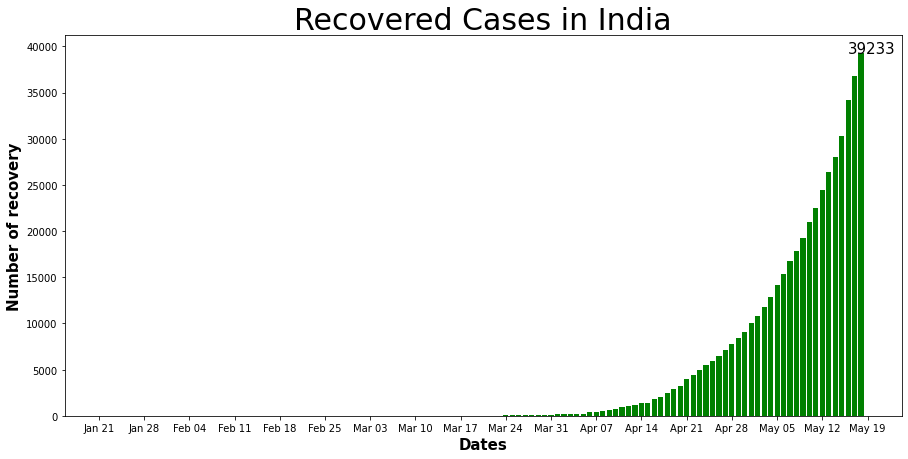

In [9]:
fig2, ax2 = plt.subplots(figsize=(15,7))
ax2.bar(india_data.index,india_data['Recovered Cases'],color = 'green')
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_title("Recovered Cases in India",size = 30)
ax2.set_xlabel("Dates",size = 15,weight = 'bold')
ax2.set_ylabel("Number of recovery",size = 15,weight = 'bold')
ax2.annotate(india_data.iloc[len(india_data)-1]['Recovered Cases'],xy = (india_data.index[len(india_data)-3],india_data.iloc[len(india_data)-1]['Recovered Cases']+50),size = 15)
plt.savefig('Recovered Cases in India.png',bbox_inches='tight',pad_inches=1)
files.download( "Recovered Cases in India.png" )

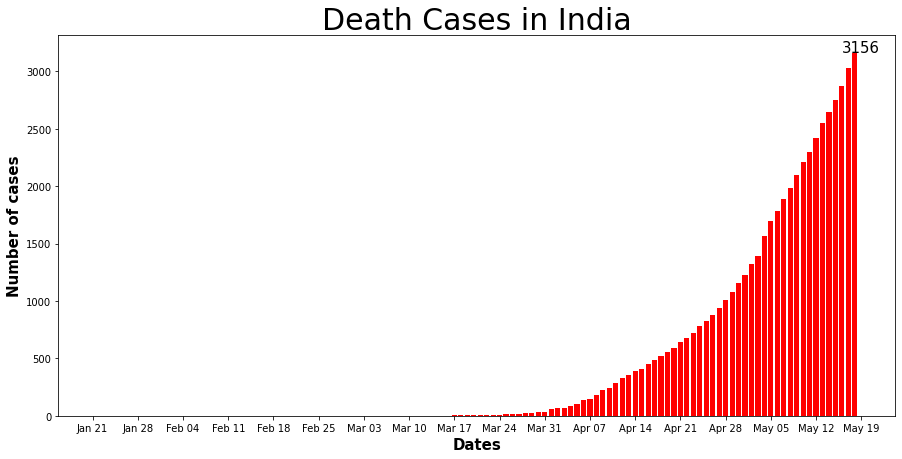

In [10]:
fig3, ax3 = plt.subplots(figsize=(15,7))
ax3.bar(india_data.index,india_data['Death Cases'],color = 'red')
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_title("Death Cases in India",size = 30)
ax3.set_xlabel("Dates",size = 15,weight = 'bold')
ax3.set_ylabel("Number of cases",size = 15,weight = 'bold')
ax3.annotate(india_data.iloc[len(india_data)-1]['Death Cases'],xy = (india_data.index[len(india_data)-3],india_data.iloc[len(india_data)-1]['Death Cases']+10),size = 15)

plt.savefig('Death Cases in India.png',bbox_inches='tight',pad_inches=1)
files.download( "Death Cases in India.png" )

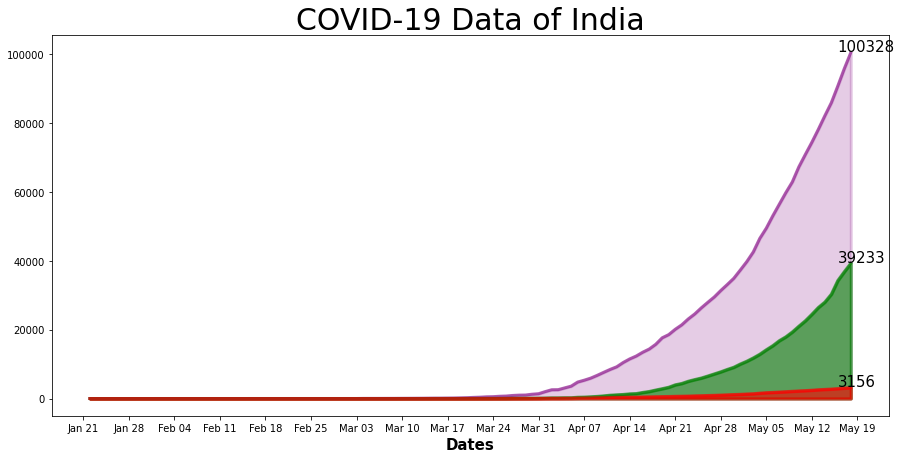

In [11]:
fig5, ax5 = plt.subplots(figsize=(15,7))
ax5.plot(india_data.index,india_data['Confirmed Cases'],color = 'purple',lw = 3,alpha = 0.6)
ax5.fill_between(india_data.index,india_data['Confirmed Cases'],color = 'purple',lw = 3,alpha = 0.2)
ax5.plot(india_data.index,india_data['Recovered Cases'],color = 'green',lw = 3,alpha = 0.6)
ax5.plot(india_data.index,india_data['Death Cases'],color = 'red',lw = 3,alpha = 0.6)
ax5.fill_between(india_data.index,india_data['Recovered Cases'],color = 'green',lw = 3,alpha = 0.6)
ax5.fill_between(india_data.index,india_data['Death Cases'],color = 'red',lw = 3,alpha = 0.6)
ax5.xaxis.set_major_locator(mdates.WeekdayLocator())
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax5.set_title("COVID-19 Data of India",size = 30)
ax5.set_xlabel("Dates",size = 15,weight = 'bold')

ax5.annotate(india_data.iloc[len(india_data)-1]['Confirmed Cases'],xy = (india_data.index[len(india_data)-3],india_data.iloc[len(india_data)-1]['Confirmed Cases']+400),size = 15)
ax5.annotate(india_data.iloc[len(india_data)-1]['Recovered Cases'],xy = (india_data.index[len(india_data)-3],india_data.iloc[len(india_data)-1]['Recovered Cases']+400),size = 15)
ax5.annotate(india_data.iloc[len(india_data)-1]['Death Cases'],xy = (india_data.index[len(india_data)-3],india_data.iloc[len(india_data)-1]['Death Cases']+400),size = 15)

plt.savefig('COVID-19 Data of India.png',bbox_inches='tight',pad_inches=1)
files.download( "COVID-19 Data of India.png" )

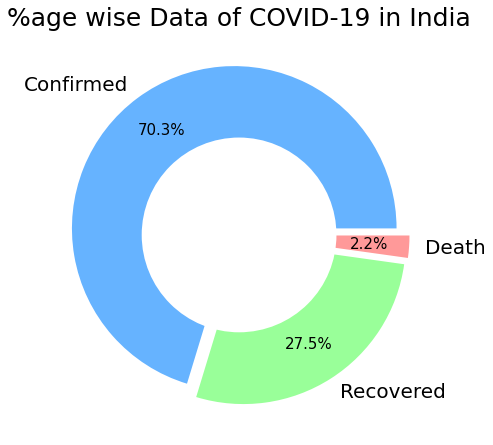

In [12]:
labels = ['Confirmed','Recovered','Death']
sizes = list(india_data.iloc[len(india_data)-1])
explode = (0.05,0.05,0.05)  
colours = ['#66b3ff','#99ff99','#ff9999']

fig6, ax6 = plt.subplots(figsize=(7,7))
patches, texts, autotexts = ax6.pie(sizes, explode=explode, labels=labels, pctdistance=0.75,autopct='%1.1f%%',shadow=False, startangle=0,colors = colours)

for text in texts:
    text.set_size(20)
for autotext in autotexts:
    autotext.set_size(15)
    
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax6.set_title("%age wise Data of COVID-19 in India",size = 25)
plt.tight_layout()

plt.savefig('percentage wise Data of COVID-19 in India.png',bbox_inches='tight',pad_inches=1)
files.download( "percentage wise Data of COVID-19 in India.png" )